In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import linear_model
import seaborn as sns
%matplotlib inline
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn import preprocessing


In [2]:
df=pd.read_csv('fifa2019.csv')
df.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,���226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,���127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,���228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,���138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,���196.4M


In [3]:
df.shape

(18207, 89)

In [4]:
df.columns

Index([u'Unnamed: 0', u'ID', u'Name', u'Age', u'Photo', u'Nationality',
       u'Flag', u'Overall', u'Potential', u'Club', u'Club Logo', u'Value',
       u'Wage', u'Special', u'Preferred Foot', u'International Reputation',
       u'Weak Foot', u'Skill Moves', u'Work Rate', u'Body Type', u'Real Face',
       u'Position', u'Jersey Number', u'Joined', u'Loaned From',
       u'Contract Valid Until', u'Height', u'Weight', u'LS', u'ST', u'RS',
       u'LW', u'LF', u'CF', u'RF', u'RW', u'LAM', u'CAM', u'RAM', u'LM',
       u'LCM', u'CM', u'RCM', u'RM', u'LWB', u'LDM', u'CDM', u'RDM', u'RWB',
       u'LB', u'LCB', u'CB', u'RCB', u'RB', u'Crossing', u'Finishing',
       u'HeadingAccuracy', u'ShortPassing', u'Volleys', u'Dribbling', u'Curve',
       u'FKAccuracy', u'LongPassing', u'BallControl', u'Acceleration',
       u'SprintSpeed', u'Agility', u'Reactions', u'Balance', u'ShotPower',
       u'Jumping', u'Stamina', u'Strength', u'LongShots', u'Aggression',
       u'Interceptions', u'Positioning

In [5]:
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [6]:
df.drop(['Unnamed: 0','Flag','Photo','Club Logo'],axis=1,inplace=True)

In [7]:
df.head(2)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,���110.5M,���565K,2202,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,���226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,���77M,���405K,2228,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,���127.1M


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 85 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Nationality                 18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-null object
Real Face                   18159 non-null object
Position                    18147 non-null 

In [9]:
print[df.Wage]

[0        ���565K
1        ���405K
2        ���290K
3        ���260K
4        ���355K
5        ���340K
6        ���420K
7        ���455K
8        ���380K
9         ���94K
10       ���205K
11       ���355K
12       ���125K
13       ���285K
14       ���225K
15       ���205K
16       ���205K
17       ���145K
18       ���240K
19       ���240K
20       ���315K
21       ���200K
22       ���130K
23       ���300K
24       ���215K
25       ���100K
26       ���255K
27       ���285K
28       ���315K
29       ���165K
          ...   
18177      ���1K
18178      ���1K
18179      ���1K
18180      ���1K
18181      ���1K
18182      ���1K
18183      ���1K
18184      ���1K
18185      ���1K
18186      ���1K
18187      ���1K
18188      ���1K
18189      ���1K
18190      ���1K
18191      ���1K
18192      ���1K
18193      ���1K
18194      ���1K
18195      ���1K
18196      ���1K
18197      ���1K
18198      ���1K
18199      ���1K
18200      ���1K
18201      ���1K
18202      ���1K
18203      ���1K
18204      ��

In [10]:
df.corr()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
ID,1.000000,-0.739208,-0.417025,0.047074,-0.231352,-0.356191,-0.075784,-0.056914,0.182074,-0.131994,...,-0.140657,-0.384473,-0.110198,-0.085929,-0.068409,-0.105594,-0.111149,-0.106652,-0.118250,-0.105778
Age,-0.739208,1.000000,0.452350,-0.253312,0.236695,0.253765,0.059867,0.027649,-0.241156,0.130545,...,0.139535,0.391023,0.142817,0.119745,0.103089,0.101277,0.106419,0.104964,0.116402,0.103313
Overall,-0.417025,0.452350,1.000000,0.660939,0.606960,0.499491,0.212015,0.414463,-0.218931,0.394972,...,0.341429,0.727655,0.286505,0.252629,0.222811,-0.025937,-0.025062,-0.029372,-0.017674,-0.023276
Potential,0.047074,-0.253312,0.660939,1.000000,0.383727,0.372993,0.162346,0.354290,-0.010474,0.246319,...,0.224281,0.440008,0.162801,0.143564,0.128980,-0.053446,-0.054672,-0.059061,-0.052589,-0.053341
Special,-0.231352,0.236695,0.606960,0.383727,1.000000,0.292208,0.341855,0.763412,-0.133716,0.866417,...,0.734533,0.752331,0.561866,0.538802,0.506968,-0.674637,-0.673625,-0.670254,-0.668272,-0.673238
International Reputation,-0.356191,0.253765,0.499491,0.372993,0.292208,1.000000,0.128317,0.208153,-0.077298,0.191770,...,0.218620,0.392787,0.115208,0.092846,0.079176,0.004526,0.003942,0.000651,0.006904,0.003444
Weak Foot,-0.075784,0.059867,0.212015,0.162346,0.341855,0.128317,1.000000,0.340721,-0.035410,0.307925,...,0.330252,0.278132,0.065673,0.042646,0.026105,-0.231905,-0.233098,-0.229395,-0.231298,-0.232574
Skill Moves,-0.056914,0.027649,0.414463,0.354290,0.763412,0.208153,0.340721,1.000000,-0.035194,0.741035,...,0.690434,0.586836,0.241428,0.210517,0.178607,-0.621675,-0.619755,-0.616990,-0.618853,-0.621925
Jersey Number,0.182074,-0.241156,-0.218931,-0.010474,-0.133716,-0.077298,-0.035410,-0.035194,1.000000,-0.076585,...,-0.028023,-0.167523,-0.142474,-0.133285,-0.124610,0.004807,0.001543,0.001162,-0.002736,0.003255
Crossing,-0.131994,0.130545,0.394972,0.246319,0.866417,0.191770,0.307925,0.741035,-0.076585,1.000000,...,0.645805,0.575446,0.443101,0.428963,0.409961,-0.663053,-0.660193,-0.659767,-0.660160,-0.662539


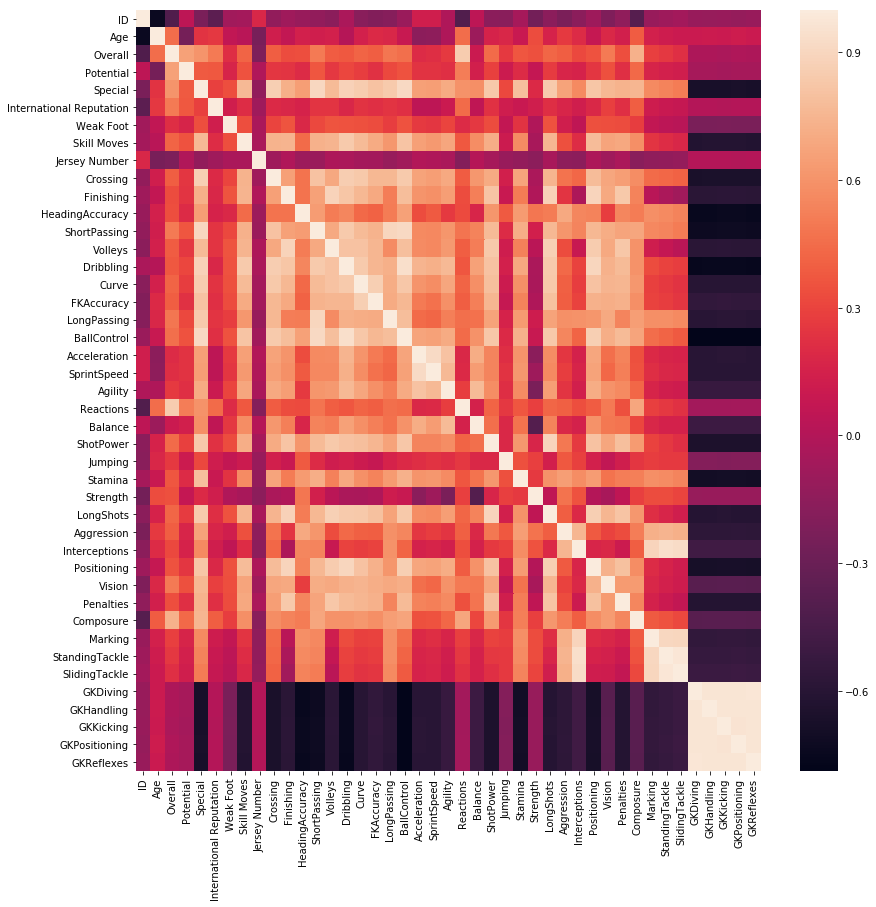

In [11]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr())

In [12]:
df.columns

Index([u'ID', u'Name', u'Age', u'Nationality', u'Overall', u'Potential',
       u'Club', u'Value', u'Wage', u'Special', u'Preferred Foot',
       u'International Reputation', u'Weak Foot', u'Skill Moves', u'Work Rate',
       u'Body Type', u'Real Face', u'Position', u'Jersey Number', u'Joined',
       u'Loaned From', u'Contract Valid Until', u'Height', u'Weight', u'LS',
       u'ST', u'RS', u'LW', u'LF', u'CF', u'RF', u'RW', u'LAM', u'CAM', u'RAM',
       u'LM', u'LCM', u'CM', u'RCM', u'RM', u'LWB', u'LDM', u'CDM', u'RDM',
       u'RWB', u'LB', u'LCB', u'CB', u'RCB', u'RB', u'Crossing', u'Finishing',
       u'HeadingAccuracy', u'ShortPassing', u'Volleys', u'Dribbling', u'Curve',
       u'FKAccuracy', u'LongPassing', u'BallControl', u'Acceleration',
       u'SprintSpeed', u'Agility', u'Reactions', u'Balance', u'ShotPower',
       u'Jumping', u'Stamina', u'Strength', u'LongShots', u'Aggression',
       u'Interceptions', u'Positioning', u'Vision', u'Penalties', u'Composure',
       u'Mark

In [13]:
highest_wage=df.sort_values('Wage',ascending=False)[['Name','Nationality','Wage']].head(5)
highest_wage.set_index('Name',inplace=True)
print(highest_wage)
    
    

            Nationality   Wage
Name                          
C. Teuchert     Germany  ���9K
K. Narey        Germany  ���9K
J. Ngoy         Belgium  ���9K
J. Mi��i��      Croatia  ���9K
J. Gandolfi   Argentina  ���9K


In [14]:
x=df.isnull().sum()


In [15]:
x.sort_values()

ID                          0
Wage                        0
Value                       0
Potential                   0
Special                     0
Nationality                 0
Age                         0
Name                        0
Overall                     0
Interceptions              48
GKReflexes                 48
Aggression                 48
LongShots                  48
Strength                   48
Stamina                    48
Jumping                    48
ShotPower                  48
Balance                    48
Reactions                  48
LongPassing                48
SprintSpeed                48
Acceleration               48
BallControl                48
Positioning                48
FKAccuracy                 48
Crossing                   48
Finishing                  48
HeadingAccuracy            48
ShortPassing               48
Volleys                    48
                        ...  
Contract Valid Until      289
Joined                   1553
Release Cl

In [16]:
df.shape

(18207, 85)

In [17]:
print('Maximum potential:  '  +str(df.loc[df['Potential'].idxmax()][1]))

Maximum potential:  K. Mbapp̩


In [18]:
max_pot=df.sort_values('Potential',ascending=False)[['Name','Age','Potential']].head(5)
max_pot.set_index('Name')

,Age,Potential
Name,,
K. Mbapp̩,19,95
L. Messi,31,94
P. Dybala,24,94
Cristiano Ronaldo,33,94
Neymar Jr,26,93


In [19]:

x=df.groupby('Club').count()
len(x)

651

In [20]:
df['Club'].unique().tolist()

['FC Barcelona',
 'Juventus',
 'Paris Saint-Germain',
 'Manchester United',
 'Manchester City',
 'Chelsea',
 'Real Madrid',
 'Atl\xcc\xa9tico Madrid',
 'FC Bayern M\xcc?nchen',
 'Tottenham Hotspur',
 'Liverpool',
 'Napoli',
 'Arsenal',
 'Milan',
 'Inter',
 'Lazio',
 'Borussia Dortmund',
 'Vissel Kobe',
 'Olympique Lyonnais',
 'Roma',
 'Valencia CF',
 'Guangzhou Evergrande Taobao FC',
 'FC Porto',
 'FC Schalke 04',
 'Be\x81\xd9ikta\x81\xd9 JK',
 'LA Galaxy',
 'Sporting CP',
 'Real Betis',
 'Olympique de Marseille',
 'RC Celta',
 'Bayer 04 Leverkusen',
 'Real Sociedad',
 'Villarreal CF',
 'Sevilla FC',
 'SL Benfica',
 'AS Saint-\xcc\xe4tienne',
 'AS Monaco',
 'Leicester City',
 'Atalanta',
 'Gr\xcc\xbbmio',
 'Atl\xcc\xa9tico Mineiro',
 'RB Leipzig',
 'Ajax',
 'Dalian YiFang FC',
 'Everton',
 'West Ham United',
 '1. FC K\xcc\xa6ln',
 'TSG 1899 Hoffenheim',
 'Shanghai SIPG FC',
 'OGC Nice',
 'Al Nassr',
 'Wolverhampton Wanderers',
 'Borussia M\xcc\xa6nchengladbach',
 'Hertha BSC',
 'SV Wer

In [21]:
df['Club'].value_counts().head(5)

FC Barcelona    33
Burnley         33
CD Legan̩s      33
Valencia CF     33
Chelsea         33
Name: Club, dtype: int64

In [22]:
y=df.columns

In [23]:
len(y)

85

In [24]:
print('Eldestest player:  '  +str(df.loc[df['Age'].idxmax()][['Name','Age','Nationality']]))


Eldestest player:  Name           O. P̩rez
Age                  45
Nationality      Mexico
Name: 4741, dtype: object


In [25]:
print('Youngest player:  '  +str(df.loc[df['Age'].idxmin()][['Name','Age','Nationality']]))

Youngest player:  Name           W. Geubbels
Age                     16
Nationality         France
Name: 11457, dtype: object
